In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [125]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = 'DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [126]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [127]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [128]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [129]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [130]:
# Duplicated
df.duplicated().sum()

14342

In [131]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

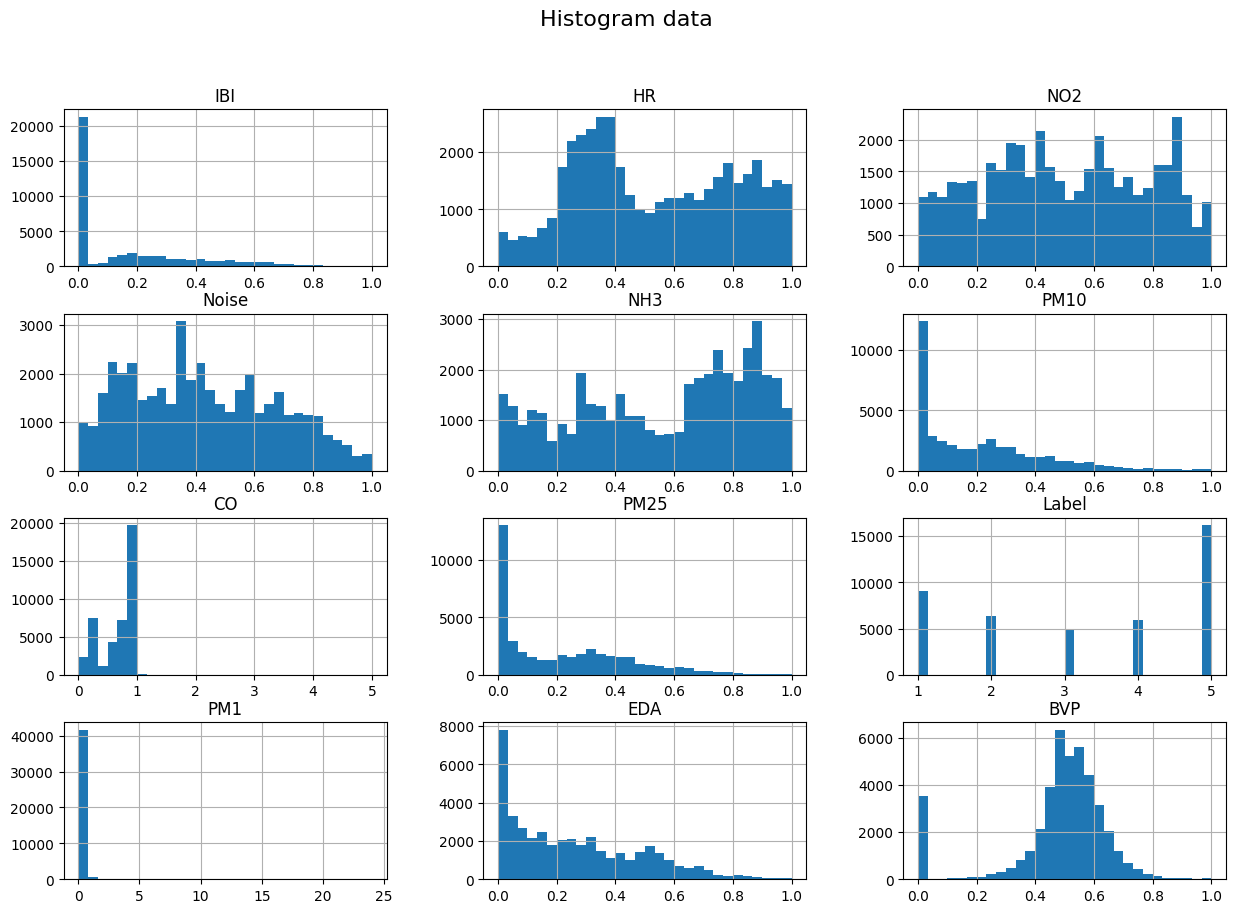

In [132]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [133]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_3301/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


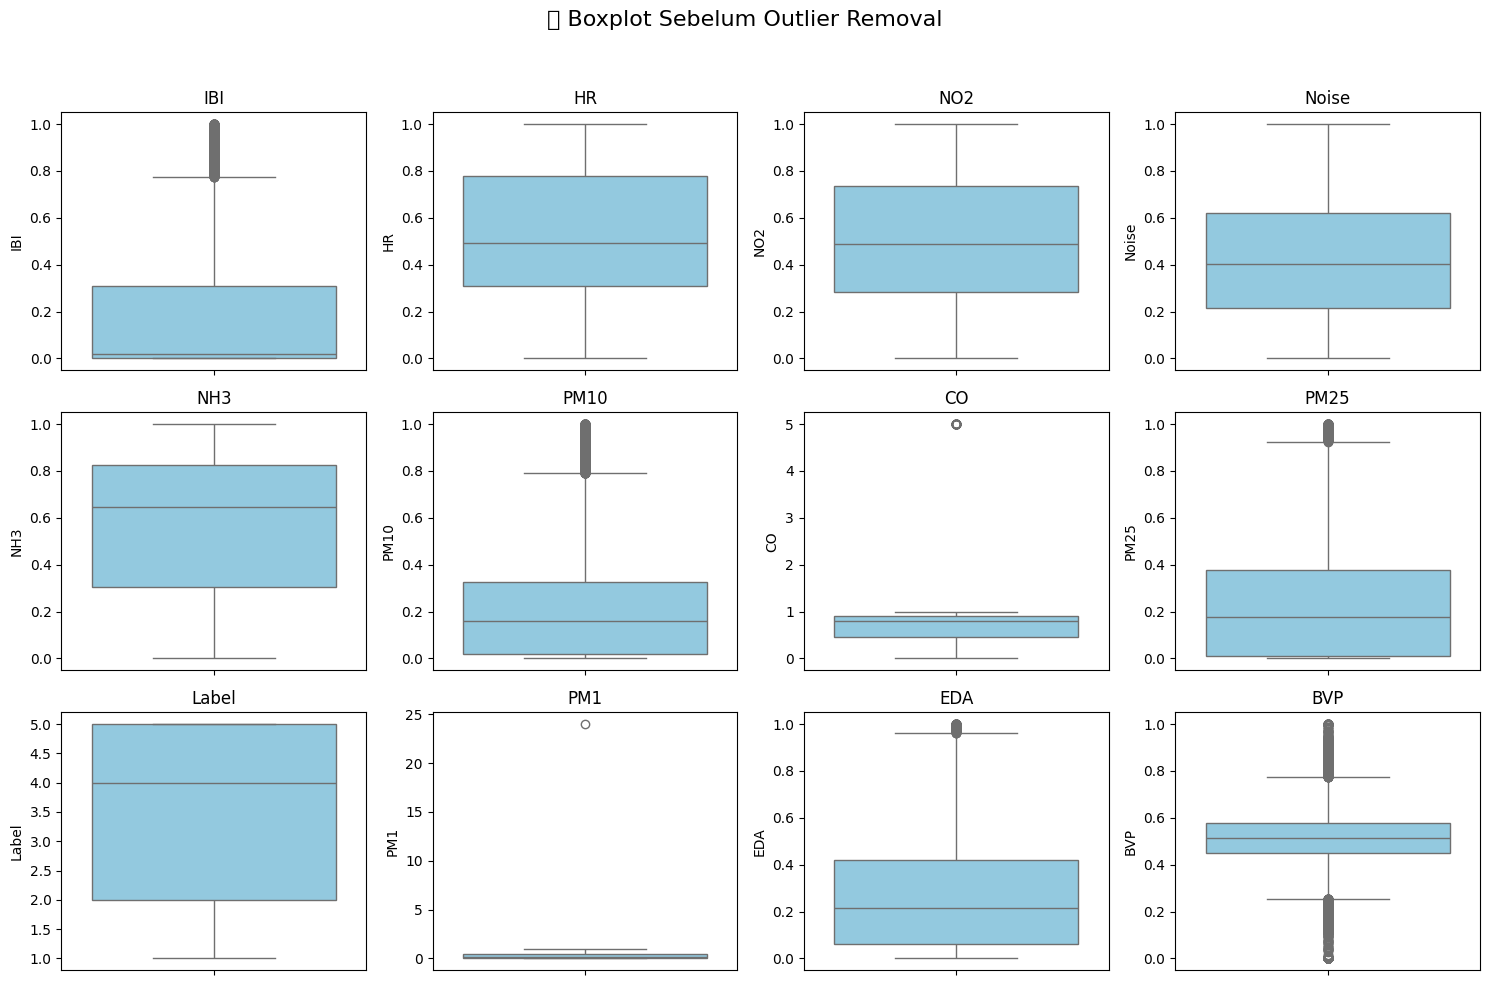

In [134]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [135]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [136]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_3301/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


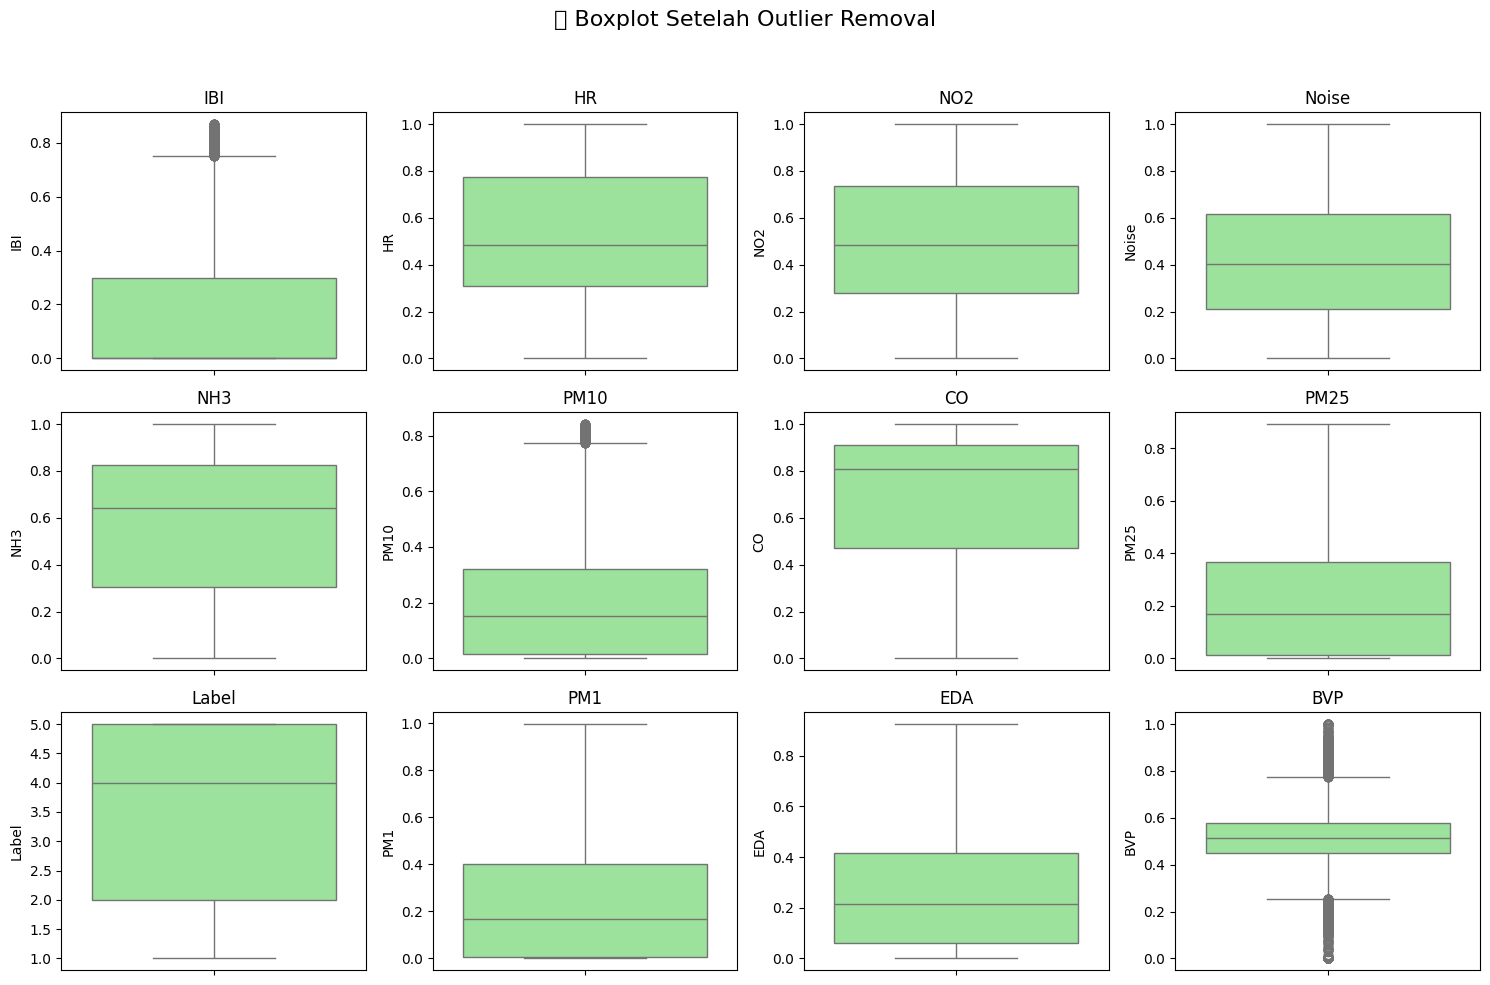

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


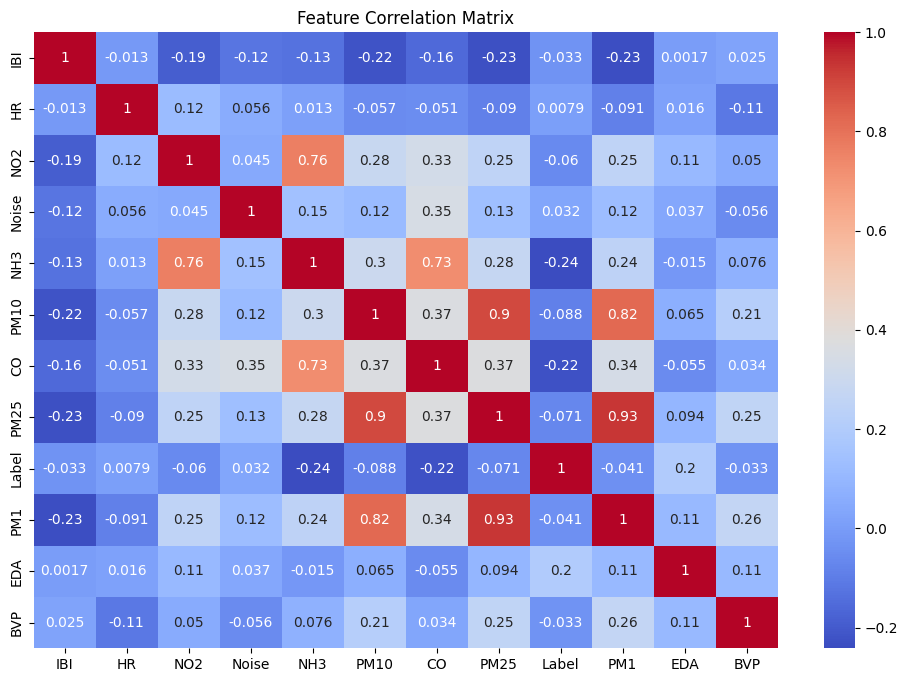

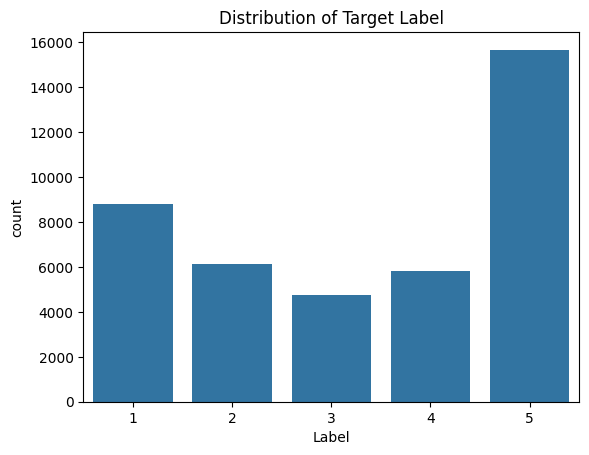

In [138]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [139]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [140]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE di X dan y
X_smote, y_smote = smote.fit_resample(X, y)

print("Sebelum SMOTE:", Counter(y))
print("Sesudah SMOTE:", Counter(y_smote))

print("\nX_smote shape:", X_smote.shape)
print("y_smote shape:", y_smote.shape)


Sebelum SMOTE: Counter({5: 15671, 1: 8805, 2: 6137, 4: 5835, 3: 4741})
Sesudah SMOTE: Counter({5: 15671, 4: 15671, 3: 15671, 2: 15671, 1: 15671})

X_smote shape: (78355, 11)
y_smote shape: (78355,)


In [141]:
y_smote.value_counts()

Label
5    15671
4    15671
3    15671
2    15671
1    15671
Name: count, dtype: int64

In [142]:
print(X_smote.info())
print(y_smote.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78355 entries, 0 to 78354
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     78355 non-null  float64
 1   HR      78355 non-null  float64
 2   NO2     78355 non-null  float64
 3   Noise   78355 non-null  float64
 4   NH3     78355 non-null  float64
 5   PM10    78355 non-null  float64
 6   CO      78355 non-null  float64
 7   PM25    78355 non-null  float64
 8   PM1     78355 non-null  float64
 9   EDA     78355 non-null  float64
 10  BVP     78355 non-null  float64
dtypes: float64(11)
memory usage: 6.6 MB
None
Label
5    15671
4    15671
3    15671
2    15671
1    15671
Name: count, dtype: int64


## Prepocessing

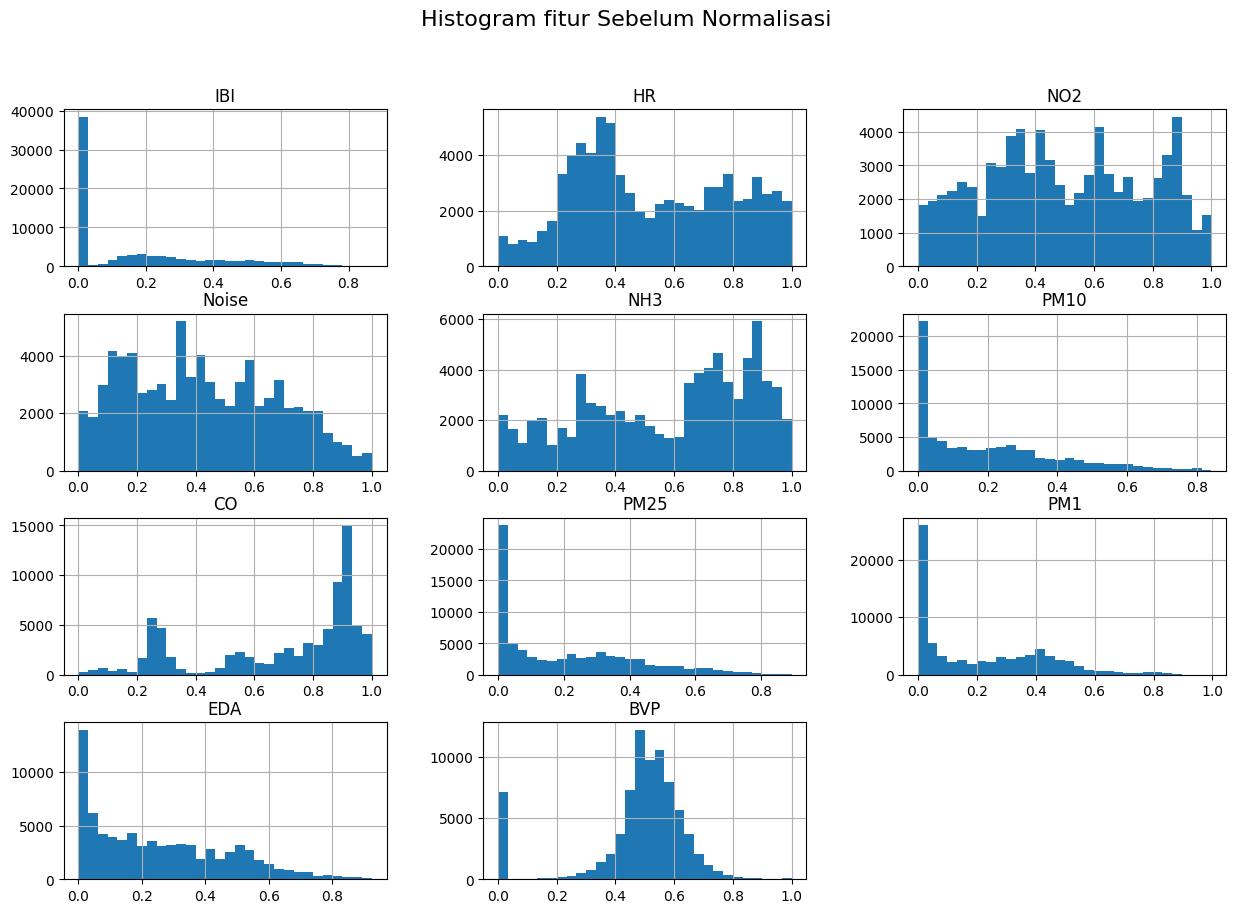

In [143]:
# Histogram sebelum normalisasi
X_smote.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [144]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [145]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (62684, 11)
Data Test after normalisation = (15671, 11)


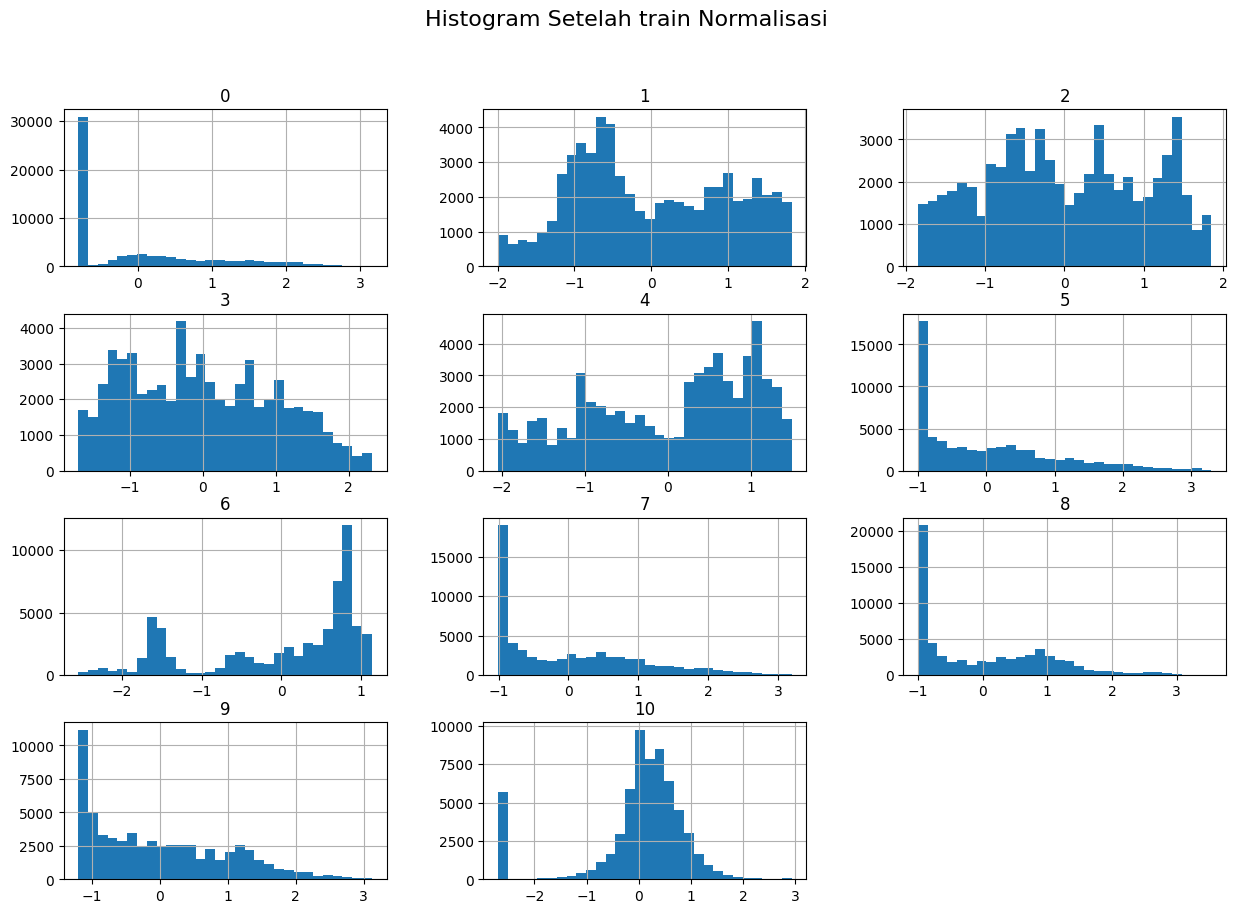

In [146]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

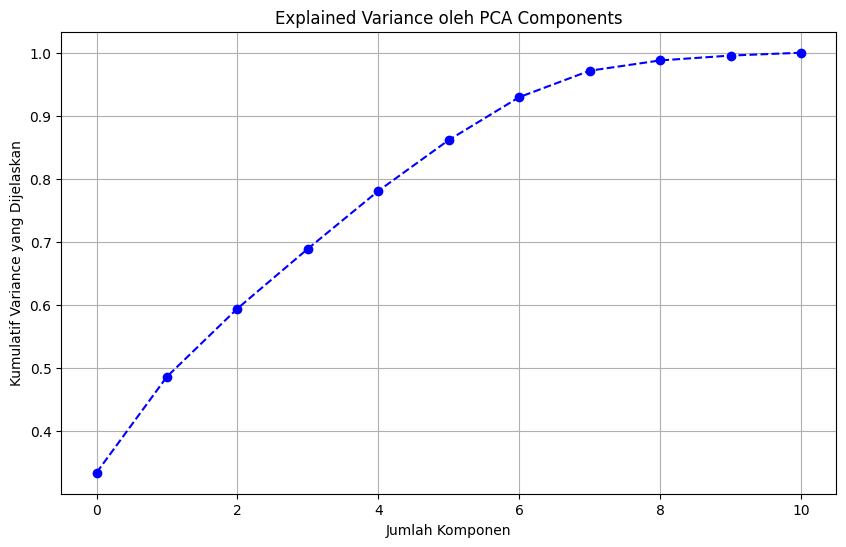

In [147]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [148]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3336 variance terjelaskan
Komponen ke-2: 0.4860 variance terjelaskan
Komponen ke-3: 0.5941 variance terjelaskan
Komponen ke-4: 0.6890 variance terjelaskan
Komponen ke-5: 0.7807 variance terjelaskan
Komponen ke-6: 0.8615 variance terjelaskan
Komponen ke-7: 0.9295 variance terjelaskan
Komponen ke-8: 0.9714 variance terjelaskan
Komponen ke-9: 0.9878 variance terjelaskan
Komponen ke-10: 0.9955 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [149]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 7)
Shape test PCA: (15671, 7)


## Training Data

In [150]:
# import pandas as pd

# # Base (data sebelum normalisasi dan PCA)
# print("\n=== X_train (original) ===")
# print(pd.DataFrame(X_train).head())
# print("Shape:", X_train.shape)

# print("\n=== X_test (original) ===")
# print(pd.DataFrame(X_test).head())
# print("Shape:", X_test.shape)

# print("\n=== y_train ===")
# print(y_train.head())
# print("Shape:", y_train.shape)

# print("\n=== y_test ===")
# print(y_test.head())
# print("Shape:", y_test.shape)

# # Normalisasi
# print("\n=== X_train_scaled (StandardScaler) ===")
# print(pd.DataFrame(X_train_scaled).head())
# print("Shape:", X_train_scaled.shape)

# print("\n=== X_test_scaled (StandardScaler) ===")
# print(pd.DataFrame(X_test_scaled).head())
# print("Shape:", X_test_scaled.shape)

# # PCA
# print("\n=== X_train_pca (7 komponen) ===")
# print(pd.DataFrame(X_train_pca).head())
# print("Shape:", X_train_pca.shape)

# print("\n=== X_test_pca (7 komponen) ===")
# print(pd.DataFrame(X_test_pca).head())
# print("Shape:", X_test_pca.shape)



=== X_train (original) ===
            IBI        HR       NO2     Noise       NH3      PM10        CO  \
29886  0.158172  0.331682  0.052767  0.370931  0.131867  0.423051  0.270329   
3220   0.000000  0.092443  0.115103  0.413797  0.043413  0.018170  0.354071   
42705  0.511356  0.158940  0.493401  0.425955  0.782450  0.671931  0.886363   
58457  0.000000  0.716376  0.912400  0.677896  0.893383  0.011156  0.851573   
7483   0.000000  0.134650  0.706180  0.555894  0.634476  0.425001  0.983640   

           PM25       PM1       EDA       BVP  
29886  0.423051  0.000000  0.133723  0.522021  
3220   0.000000  0.000000  0.275862  0.524985  
42705  0.651155  0.423014  0.020260  0.492624  
58457  0.021067  0.028886  0.000000  0.717837  
7483   0.365765  0.549684  0.495686  0.472476  
Shape: (62684, 11)

=== X_test (original) ===
            IBI        HR       NO2     Noise       NH3      PM10        CO  \
5716   0.000000  0.916974  0.631780  0.052633  0.368461  0.000000  0.411865   
34181

Training Menggunakan data split non normalisation


🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      3123
           2       0.99      0.99      0.99      3143
           3       1.00      1.00      1.00      3044
           4       0.99      0.99      0.99      3162
           5       0.99      0.99      0.99      3199

    accuracy                           0.99     15671
   macro avg       0.99      0.99      0.99     15671
weighted avg       0.99      0.99      0.99     15671



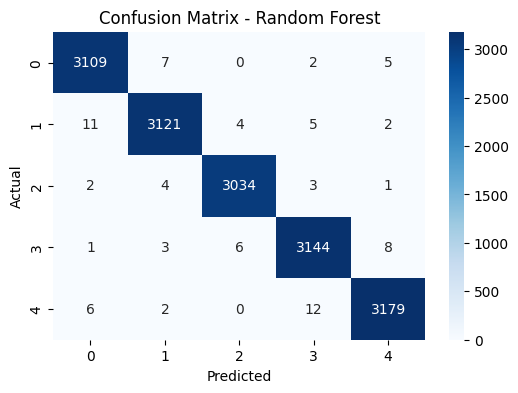


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3123
           2       0.98      0.98      0.98      3143
           3       0.98      0.99      0.98      3044
           4       0.97      0.99      0.98      3162
           5       0.99      0.97      0.98      3199

    accuracy                           0.98     15671
   macro avg       0.98      0.98      0.98     15671
weighted avg       0.98      0.98      0.98     15671



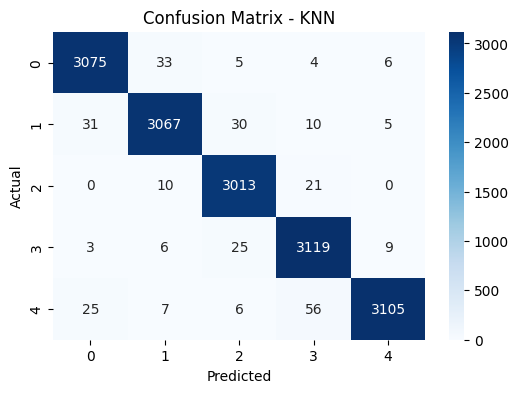


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.35      0.62      0.45      3123
           2       0.48      0.67      0.56      3143
           3       0.36      0.22      0.27      3044
           4       0.36      0.29      0.33      3162
           5       0.47      0.20      0.28      3199

    accuracy                           0.40     15671
   macro avg       0.41      0.40      0.38     15671
weighted avg       0.41      0.40      0.38     15671



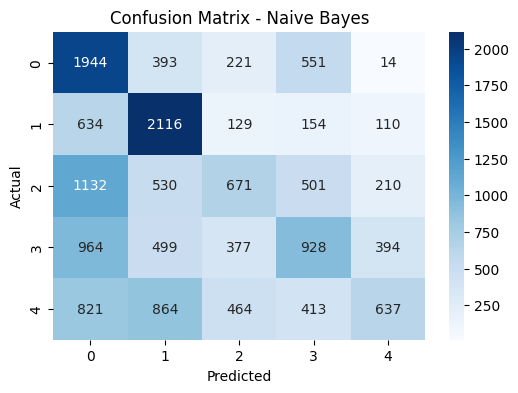


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.98      0.99      0.99      3123
           2       0.98      0.98      0.98      3143
           3       0.98      0.99      0.99      3044
           4       0.98      0.99      0.98      3162
           5       0.98      0.97      0.98      3199

    accuracy                           0.98     15671
   macro avg       0.98      0.98      0.98     15671
weighted avg       0.98      0.98      0.98     15671



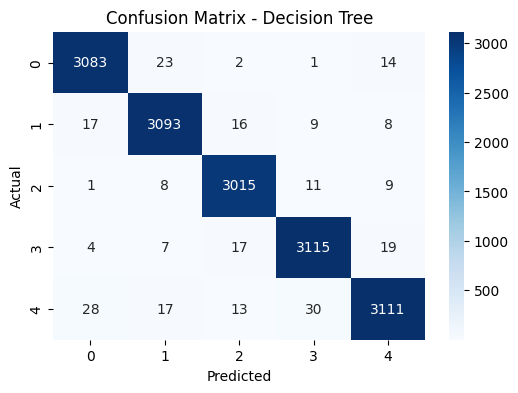


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.994640   0.994653  0.994658  0.994655
KNN            0.981367   0.981412  0.981456  0.981387
Naive Bayes    0.401761   0.405170  0.401753  0.377967
Decision Tree  0.983792   0.983794  0.983877  0.983826


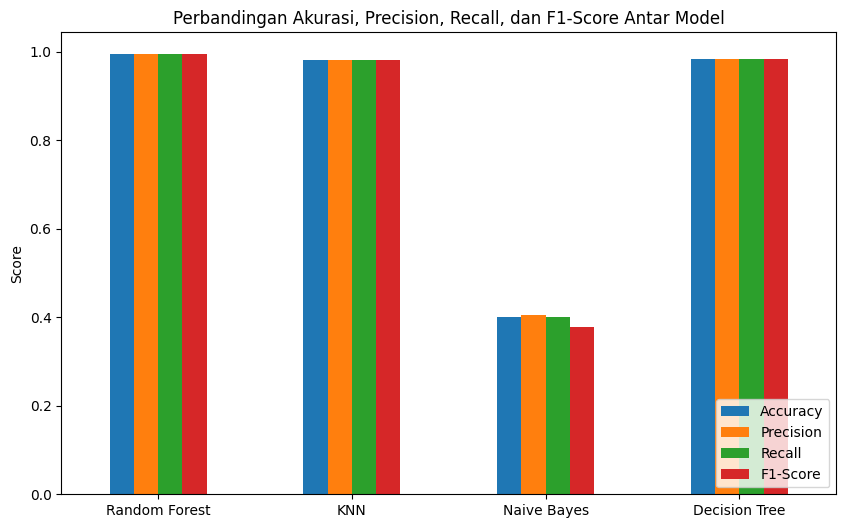

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training
    model.fit(X_train, y_train)
    
    # Prediction
    y_pred = model.predict(X_test)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


Train Normalisasi


In [153]:
X_train

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,PM1,EDA,BVP
29886,0.158172,0.331682,0.052767,0.370931,0.131867,0.423051,0.270329,0.423051,0.000000,0.133723,0.522021
3220,0.000000,0.092443,0.115103,0.413797,0.043413,0.018170,0.354071,0.000000,0.000000,0.275862,0.524985
42705,0.511356,0.158940,0.493401,0.425955,0.782450,0.671931,0.886363,0.651155,0.423014,0.020260,0.492624
58457,0.000000,0.716376,0.912400,0.677896,0.893383,0.011156,0.851573,0.021067,0.028886,0.000000,0.717837
7483,0.000000,0.134650,0.706180,0.555894,0.634476,0.425001,0.983640,0.365765,0.549684,0.495686,0.472476
...,...,...,...,...,...,...,...,...,...,...,...
6265,0.113168,0.784079,0.793854,0.802013,0.783663,0.442895,0.990080,0.619560,0.625204,0.290364,0.519821
54886,0.136280,0.229553,0.080031,0.073286,0.127868,0.000000,0.277655,0.000000,0.000000,0.130938,0.509514
76820,0.640139,0.203303,0.536176,0.495507,0.948303,0.047844,0.937750,0.084770,0.109810,0.023244,0.459188
860,0.000000,0.840330,0.673244,0.641620,0.571058,0.051921,0.513374,0.051921,0.034614,0.000000,0.000000


In [ ]:
X_train_scaled
X_test_scaled

array([[-0.08104648, -0.72674261, -1.65218422, ..., -1.00036484,
        -0.57204875,  0.24158549],
       [-0.80137476, -1.64027955, -1.42138895, ..., -1.00036484,
         0.09134929,  0.25826474],
       [ 1.52737515, -1.38635749, -0.02077709, ...,  0.92496247,
        -1.10160696,  0.07615172],
       ...,
       [ 2.11386408, -1.21695854,  0.13759281, ..., -0.50056951,
        -1.08768079, -0.1120084 ],
       [-0.80137476,  1.21553162,  0.64507504, ..., -0.84282236,
        -1.19616792, -2.69608256],
       [-0.80137476, -0.90083744,  1.25014731, ...,  1.83641173,
        -1.07372054,  1.18965193]])


🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      3123
           2       1.00      0.99      0.99      3143
           3       1.00      1.00      1.00      3044
           4       0.99      0.99      0.99      3162
           5       1.00      0.99      0.99      3199

    accuracy                           1.00     15671
   macro avg       1.00      1.00      1.00     15671
weighted avg       1.00      1.00      1.00     15671



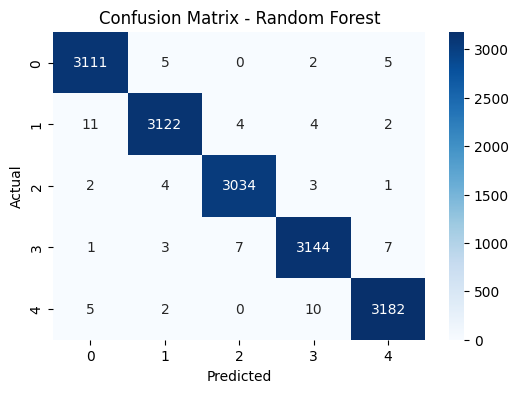


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.98      0.99      0.99      3123
           2       0.98      0.98      0.98      3143
           3       0.98      0.99      0.99      3044
           4       0.98      0.98      0.98      3162
           5       0.98      0.97      0.98      3199

    accuracy                           0.98     15671
   macro avg       0.98      0.98      0.98     15671
weighted avg       0.98      0.98      0.98     15671



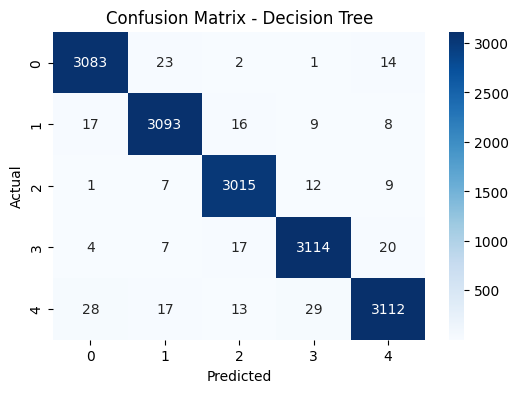


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3123
           2       0.98      0.97      0.98      3143
           3       0.97      0.99      0.98      3044
           4       0.97      0.98      0.97      3162
           5       0.99      0.96      0.98      3199

    accuracy                           0.98     15671
   macro avg       0.98      0.98      0.98     15671
weighted avg       0.98      0.98      0.98     15671



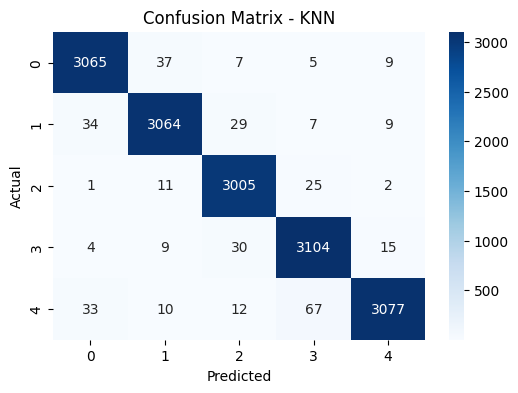


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.35      0.62      0.45      3123
           2       0.48      0.67      0.56      3143
           3       0.36      0.22      0.27      3044
           4       0.36      0.29      0.33      3162
           5       0.47      0.20      0.28      3199

    accuracy                           0.40     15671
   macro avg       0.41      0.40      0.38     15671
weighted avg       0.41      0.40      0.38     15671



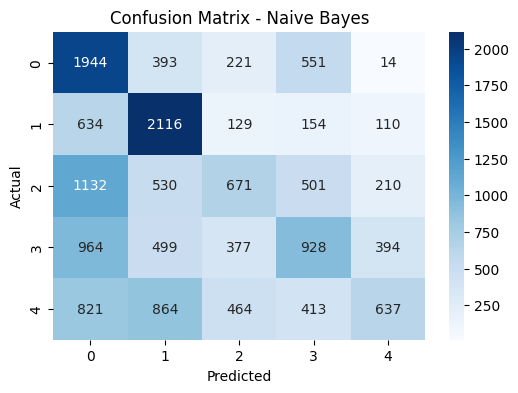


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.995023   0.995031  0.995037  0.995033
Decision Tree  0.983792   0.983795  0.983876  0.983827
KNN            0.977283   0.977337  0.977400  0.977312
Naive Bayes    0.401761   0.405170  0.401753  0.377967


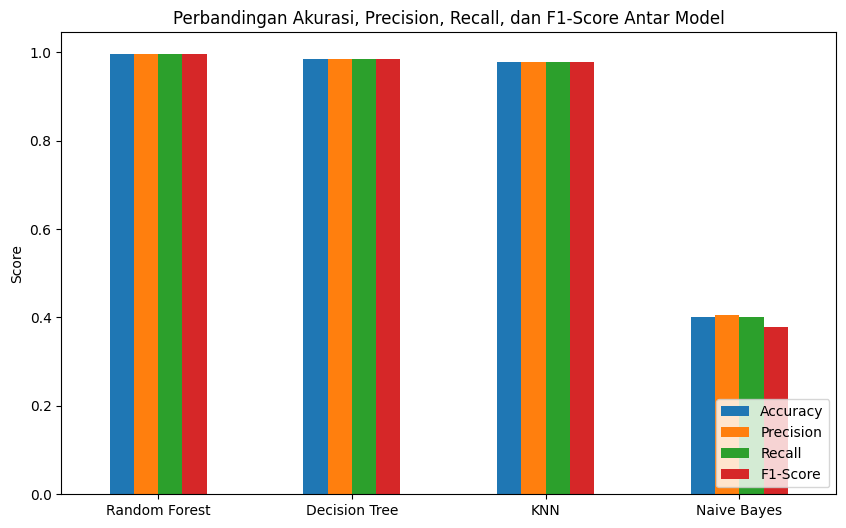

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_scaled, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [158]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 7)
Shape test PCA: (15671, 7)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3123
           2       0.99      0.98      0.98      3143
           3       0.98      0.99      0.99      3044
           4       0.98      0.98      0.98      3162
           5       0.98      0.97      0.98      3199

    accuracy                           0.98     15671
   macro avg       0.98      0.98      0.98     15671
weighted avg       0.98      0.98      0.98     15671



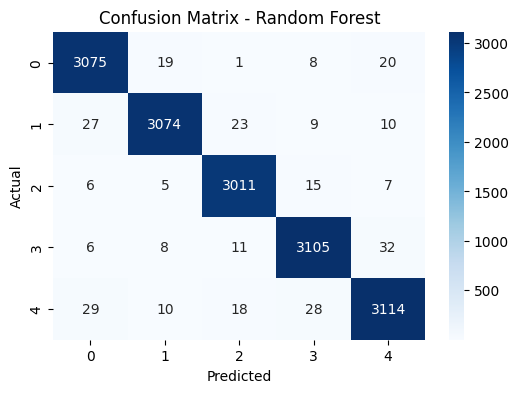


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      3123
           2       0.96      0.96      0.96      3143
           3       0.95      0.97      0.96      3044
           4       0.95      0.96      0.95      3162
           5       0.95      0.93      0.94      3199

    accuracy                           0.95     15671
   macro avg       0.95      0.95      0.95     15671
weighted avg       0.95      0.95      0.95     15671



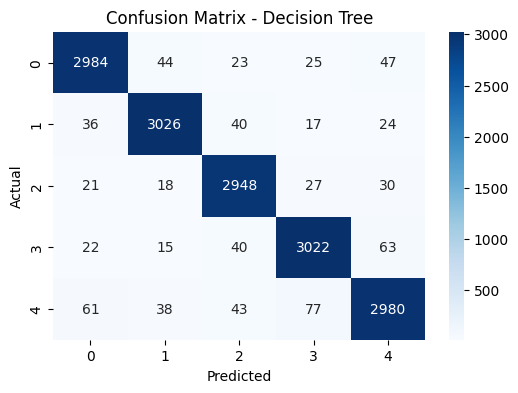


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3123
           2       0.97      0.97      0.97      3143
           3       0.96      0.98      0.97      3044
           4       0.96      0.97      0.97      3162
           5       0.98      0.94      0.96      3199

    accuracy                           0.97     15671
   macro avg       0.97      0.97      0.97     15671
weighted avg       0.97      0.97      0.97     15671



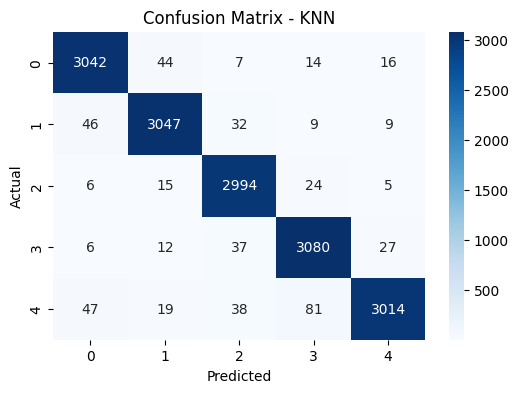


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.47      0.61      0.53      3123
           2       0.51      0.62      0.56      3143
           3       0.40      0.43      0.42      3044
           4       0.46      0.40      0.43      3162
           5       0.40      0.23      0.29      3199

    accuracy                           0.46     15671
   macro avg       0.45      0.46      0.44     15671
weighted avg       0.45      0.46      0.44     15671



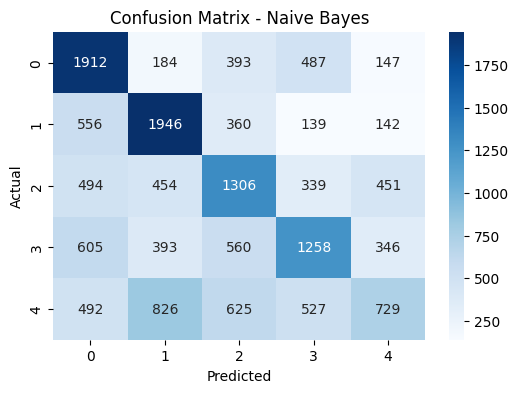


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.981367   0.981391  0.981448  0.981410
Decision Tree  0.954630   0.954627  0.954799  0.954686
KNN            0.968477   0.968561  0.968666  0.968499
Naive Bayes    0.456321   0.448890  0.457232  0.444904


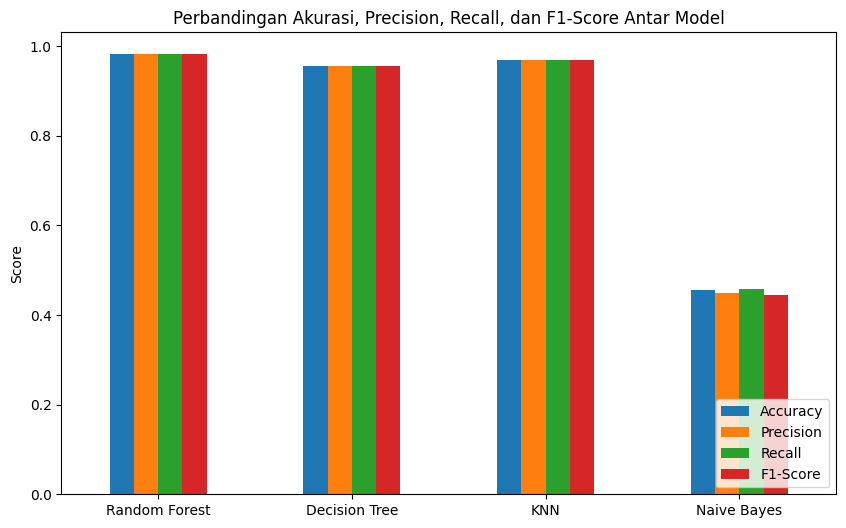

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [160]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 6)
Shape test PCA: (15671, 6)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      3123
           2       0.99      0.98      0.98      3143
           3       0.98      0.99      0.99      3044
           4       0.98      0.98      0.98      3162
           5       0.98      0.97      0.98      3199

    accuracy                           0.98     15671
   macro avg       0.98      0.98      0.98     15671
weighted avg       0.98      0.98      0.98     15671



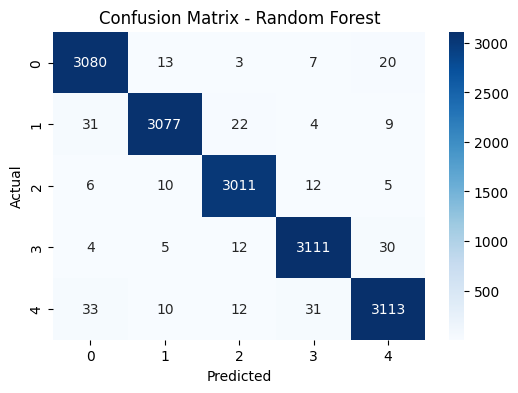


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.95      0.96      0.96      3123
           2       0.96      0.96      0.96      3143
           3       0.96      0.97      0.96      3044
           4       0.95      0.96      0.96      3162
           5       0.95      0.93      0.94      3199

    accuracy                           0.96     15671
   macro avg       0.96      0.96      0.96     15671
weighted avg       0.96      0.96      0.96     15671



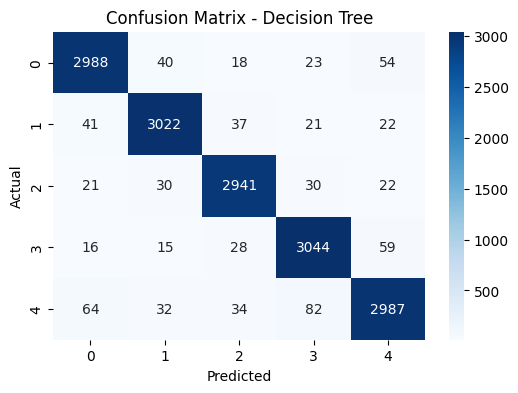


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3123
           2       0.97      0.97      0.97      3143
           3       0.97      0.98      0.97      3044
           4       0.96      0.98      0.97      3162
           5       0.98      0.95      0.96      3199

    accuracy                           0.97     15671
   macro avg       0.97      0.97      0.97     15671
weighted avg       0.97      0.97      0.97     15671



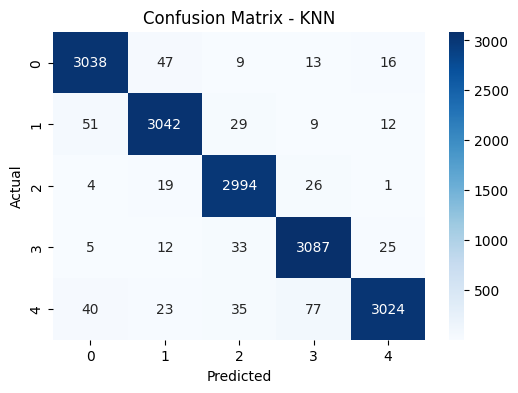


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.46      0.62      0.53      3123
           2       0.51      0.63      0.57      3143
           3       0.41      0.42      0.41      3044
           4       0.44      0.39      0.41      3162
           5       0.40      0.20      0.27      3199

    accuracy                           0.45     15671
   macro avg       0.44      0.45      0.44     15671
weighted avg       0.44      0.45      0.44     15671



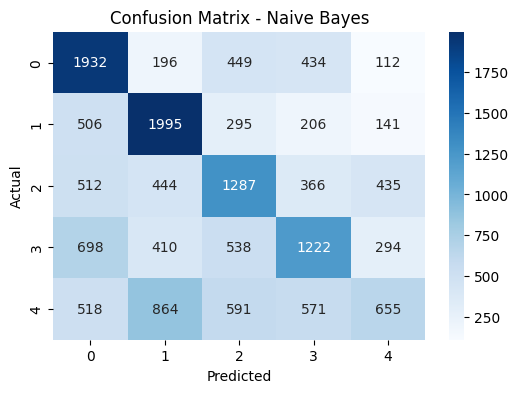


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.982196   0.982224  0.982276  0.982237
Decision Tree  0.956033   0.956083  0.956170  0.956104
KNN            0.968987   0.969069  0.969160  0.969013
Naive Bayes    0.452492   0.443620  0.453479  0.438338


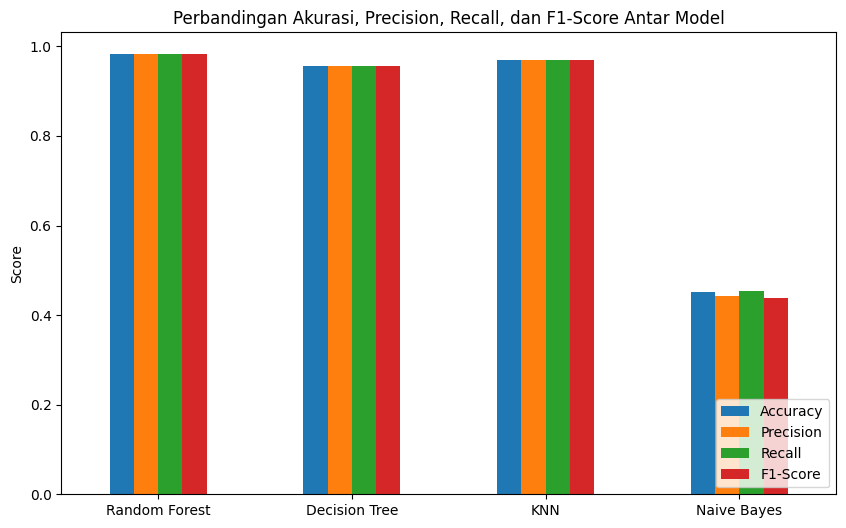

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [162]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 5)
Shape test PCA: (15671, 5)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.97      0.98      0.97      3123
           2       0.98      0.97      0.97      3143
           3       0.98      0.98      0.98      3044
           4       0.97      0.97      0.97      3162
           5       0.97      0.96      0.96      3199

    accuracy                           0.97     15671
   macro avg       0.97      0.97      0.97     15671
weighted avg       0.97      0.97      0.97     15671



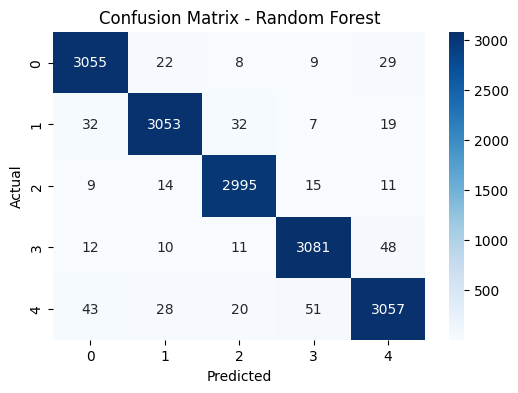


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.94      0.95      0.95      3123
           2       0.95      0.95      0.95      3143
           3       0.94      0.96      0.95      3044
           4       0.95      0.94      0.94      3162
           5       0.93      0.92      0.92      3199

    accuracy                           0.94     15671
   macro avg       0.94      0.94      0.94     15671
weighted avg       0.94      0.94      0.94     15671



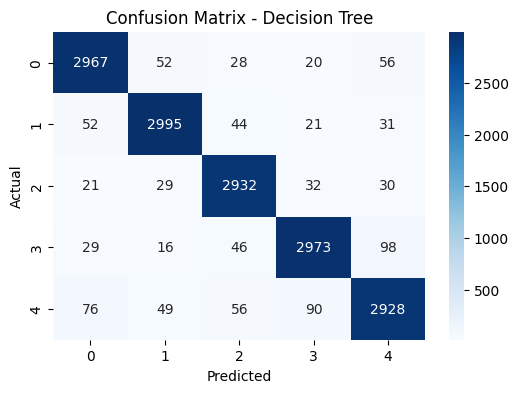


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      3123
           2       0.96      0.96      0.96      3143
           3       0.96      0.98      0.97      3044
           4       0.95      0.97      0.96      3162
           5       0.97      0.92      0.95      3199

    accuracy                           0.96     15671
   macro avg       0.96      0.96      0.96     15671
weighted avg       0.96      0.96      0.96     15671



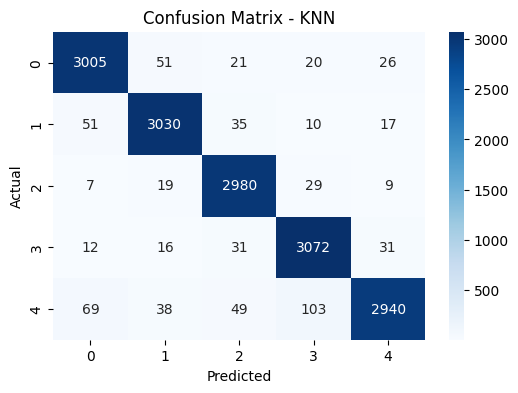


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.40      0.53      0.46      3123
           2       0.50      0.65      0.56      3143
           3       0.37      0.35      0.36      3044
           4       0.38      0.35      0.36      3162
           5       0.40      0.21      0.28      3199

    accuracy                           0.42     15671
   macro avg       0.41      0.42      0.40     15671
weighted avg       0.41      0.42      0.40     15671



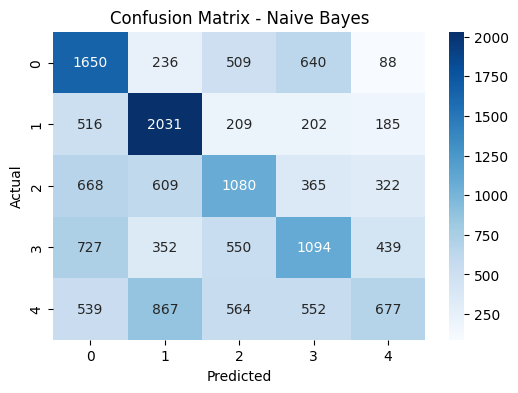


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.972561   0.972594  0.972698  0.972632
Decision Tree  0.944101   0.944103  0.944336  0.944180
KNN            0.958905   0.959056  0.959162  0.958904
Naive Bayes    0.416821   0.409684  0.417389  0.404052


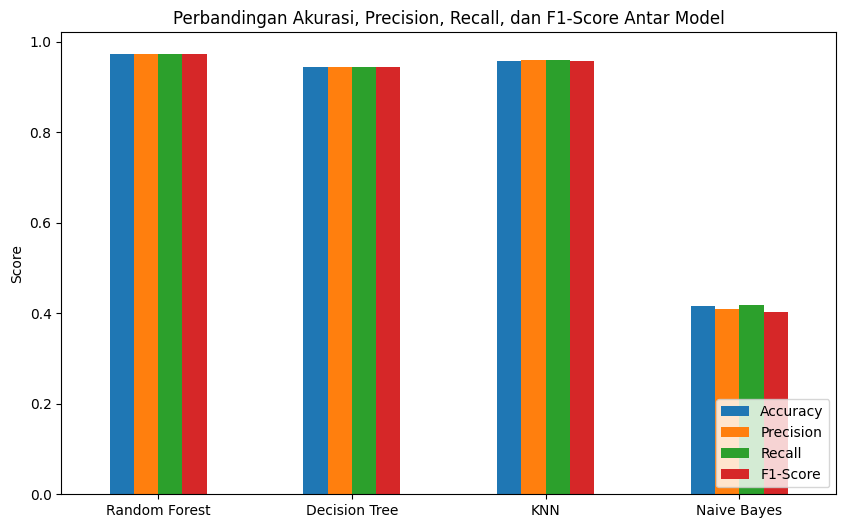

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [164]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=4)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 4)
Shape test PCA: (15671, 4)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.95      0.96      0.96      3123
           2       0.96      0.96      0.96      3143
           3       0.96      0.98      0.97      3044
           4       0.97      0.96      0.96      3162
           5       0.95      0.92      0.94      3199

    accuracy                           0.96     15671
   macro avg       0.96      0.96      0.96     15671
weighted avg       0.96      0.96      0.96     15671



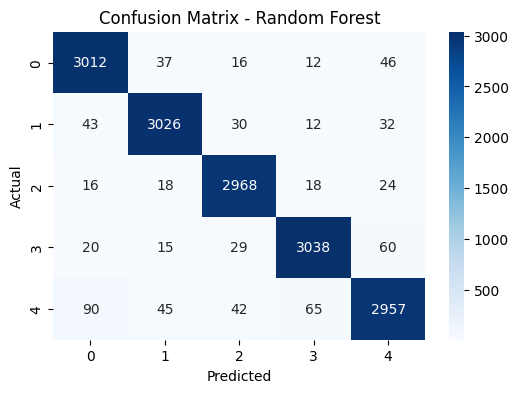


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.93      0.93      0.93      3123
           2       0.93      0.95      0.94      3143
           3       0.94      0.94      0.94      3044
           4       0.95      0.94      0.94      3162
           5       0.91      0.89      0.90      3199

    accuracy                           0.93     15671
   macro avg       0.93      0.93      0.93     15671
weighted avg       0.93      0.93      0.93     15671



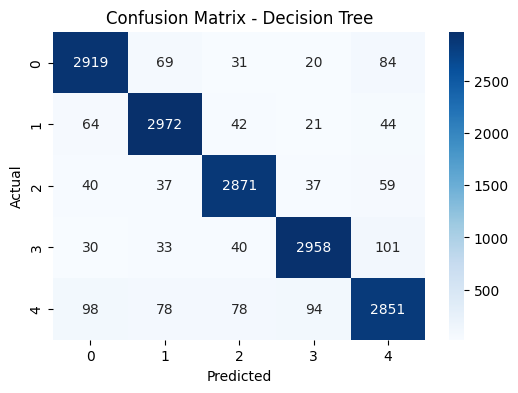


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.93      0.94      0.93      3123
           2       0.93      0.95      0.94      3143
           3       0.93      0.97      0.95      3044
           4       0.93      0.95      0.94      3162
           5       0.95      0.86      0.90      3199

    accuracy                           0.93     15671
   macro avg       0.93      0.93      0.93     15671
weighted avg       0.93      0.93      0.93     15671



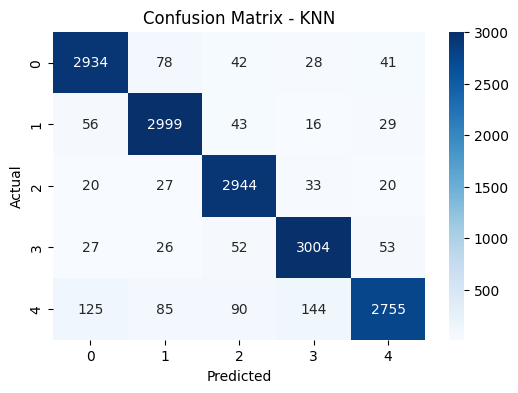


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.38      0.54      0.45      3123
           2       0.42      0.62      0.50      3143
           3       0.36      0.30      0.32      3044
           4       0.35      0.26      0.30      3162
           5       0.39      0.22      0.28      3199

    accuracy                           0.39     15671
   macro avg       0.38      0.39      0.37     15671
weighted avg       0.38      0.39      0.37     15671



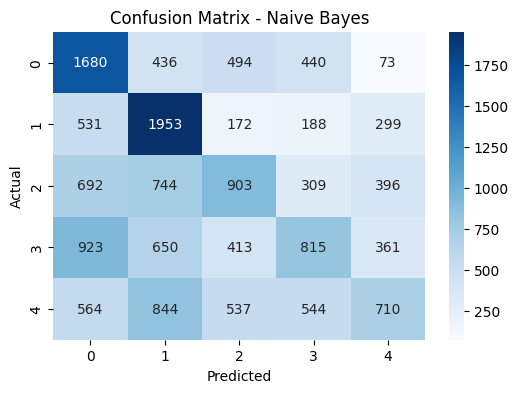


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.957246   0.957274  0.957480  0.957321
Decision Tree  0.929807   0.929850  0.930028  0.929902
KNN            0.933954   0.934250  0.934410  0.933760
Naive Bayes    0.386765   0.380859  0.387133  0.371015


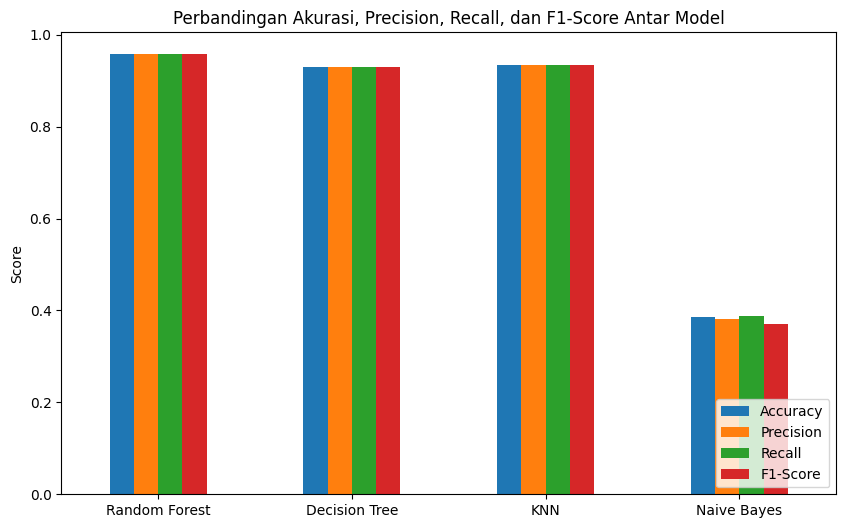

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [166]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=3)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 3)
Shape test PCA: (15671, 3)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.88      0.91      0.90      3123
           2       0.90      0.91      0.91      3143
           3       0.90      0.91      0.91      3044
           4       0.90      0.89      0.89      3162
           5       0.86      0.82      0.84      3199

    accuracy                           0.89     15671
   macro avg       0.89      0.89      0.89     15671
weighted avg       0.89      0.89      0.89     15671



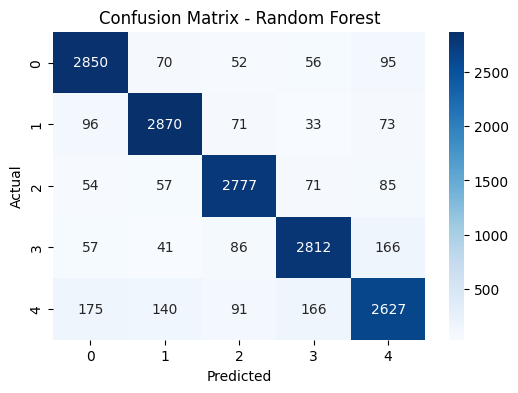


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.85      0.87      0.86      3123
           2       0.88      0.88      0.88      3143
           3       0.88      0.87      0.88      3044
           4       0.87      0.86      0.86      3162
           5       0.81      0.80      0.81      3199

    accuracy                           0.86     15671
   macro avg       0.86      0.86      0.86     15671
weighted avg       0.86      0.86      0.86     15671



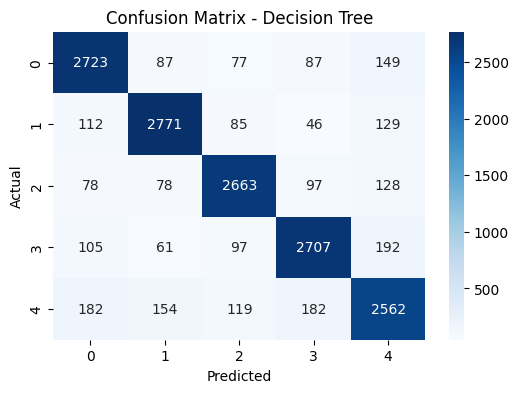


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.82      0.86      0.84      3123
           2       0.85      0.90      0.87      3143
           3       0.84      0.90      0.87      3044
           4       0.82      0.87      0.84      3162
           5       0.86      0.65      0.74      3199

    accuracy                           0.84     15671
   macro avg       0.84      0.84      0.83     15671
weighted avg       0.84      0.84      0.83     15671



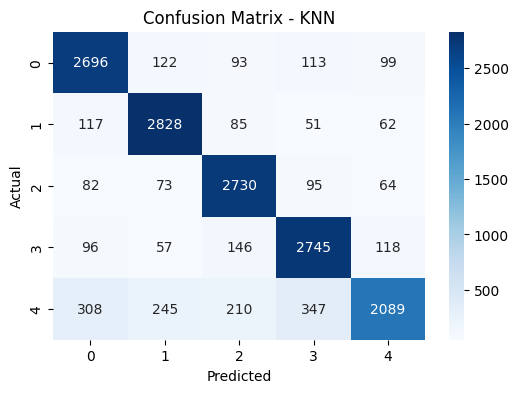


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.32      0.56      0.41      3123
           2       0.39      0.63      0.48      3143
           3       0.31      0.06      0.10      3044
           4       0.24      0.18      0.21      3162
           5       0.38      0.27      0.31      3199

    accuracy                           0.34     15671
   macro avg       0.33      0.34      0.30     15671
weighted avg       0.33      0.34      0.30     15671



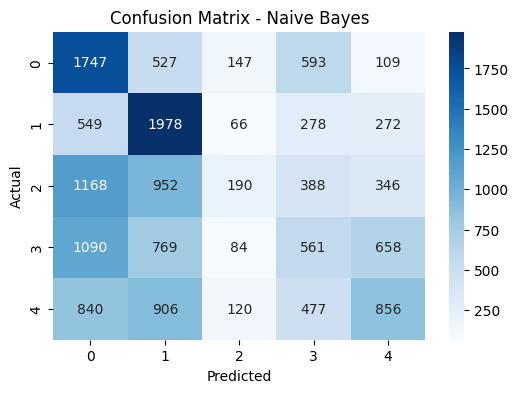


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.889286   0.889190  0.889703  0.889279
Decision Tree  0.856742   0.856941  0.857075  0.856968
KNN            0.835173   0.836453  0.836207  0.832907
Naive Bayes    0.340246   0.329704  0.339231  0.302525


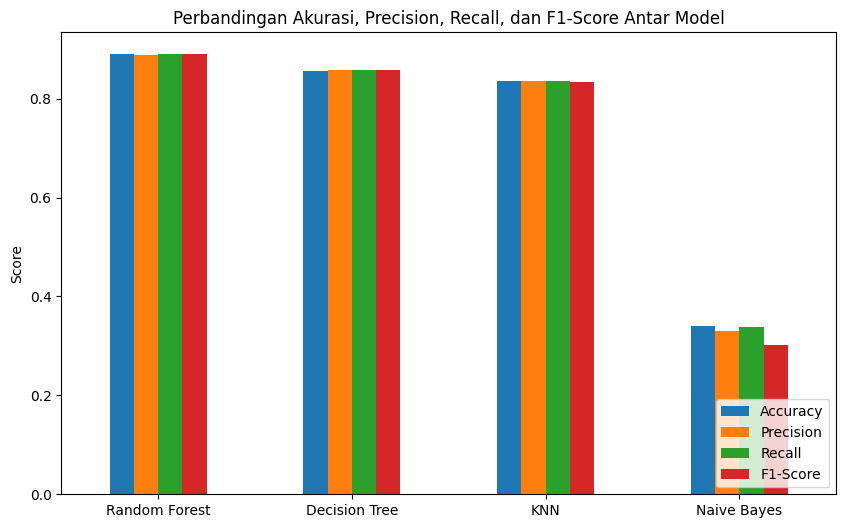

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [168]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=2)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (62684, 2)
Shape test PCA: (15671, 2)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.74      0.79      0.76      3123
           2       0.77      0.77      0.77      3143
           3       0.74      0.75      0.75      3044
           4       0.77      0.74      0.75      3162
           5       0.73      0.70      0.72      3199

    accuracy                           0.75     15671
   macro avg       0.75      0.75      0.75     15671
weighted avg       0.75      0.75      0.75     15671



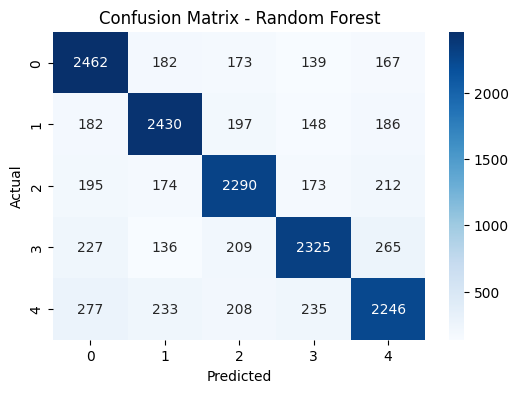


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.71      0.75      0.73      3123
           2       0.74      0.73      0.73      3143
           3       0.72      0.72      0.72      3044
           4       0.74      0.71      0.73      3162
           5       0.68      0.69      0.68      3199

    accuracy                           0.72     15671
   macro avg       0.72      0.72      0.72     15671
weighted avg       0.72      0.72      0.72     15671



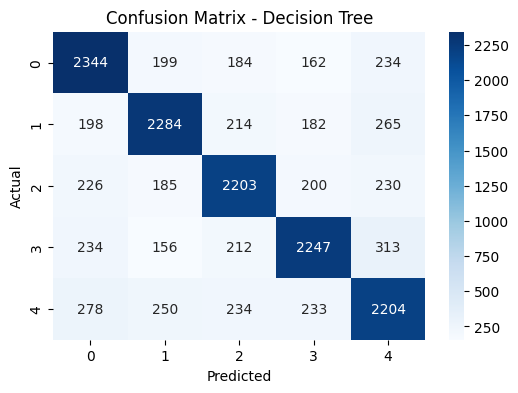


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.61      0.71      0.65      3123
           2       0.66      0.73      0.69      3143
           3       0.65      0.72      0.68      3044
           4       0.68      0.65      0.66      3162
           5       0.65      0.44      0.52      3199

    accuracy                           0.65     15671
   macro avg       0.65      0.65      0.64     15671
weighted avg       0.65      0.65      0.64     15671



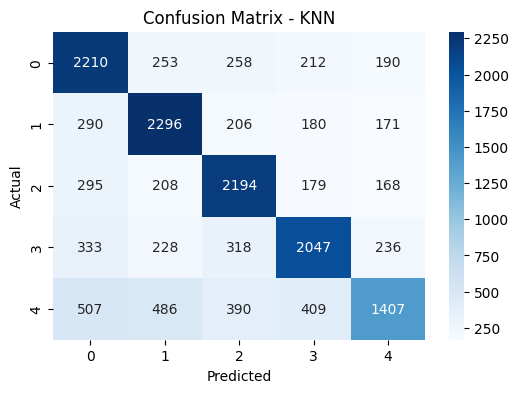


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.32      0.55      0.40      3123
           2       0.32      0.63      0.43      3143
           3       0.28      0.08      0.12      3044
           4       0.28      0.12      0.17      3162
           5       0.41      0.25      0.31      3199

    accuracy                           0.33     15671
   macro avg       0.32      0.32      0.29     15671
weighted avg       0.32      0.33      0.29     15671



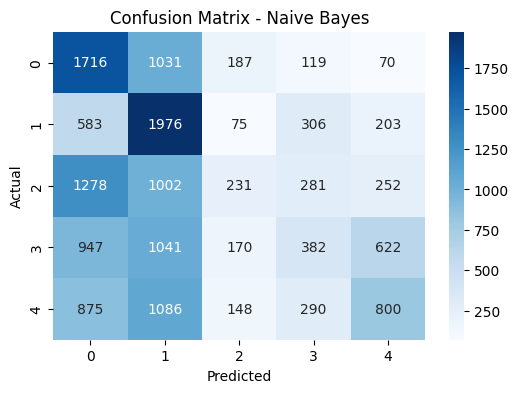


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.749984   0.750188  0.750236  0.749896
Decision Tree  0.719929   0.720538  0.720113  0.720140
KNN            0.647948   0.649062  0.649225  0.643660
Naive Bayes    0.325761   0.322561  0.324989  0.285536


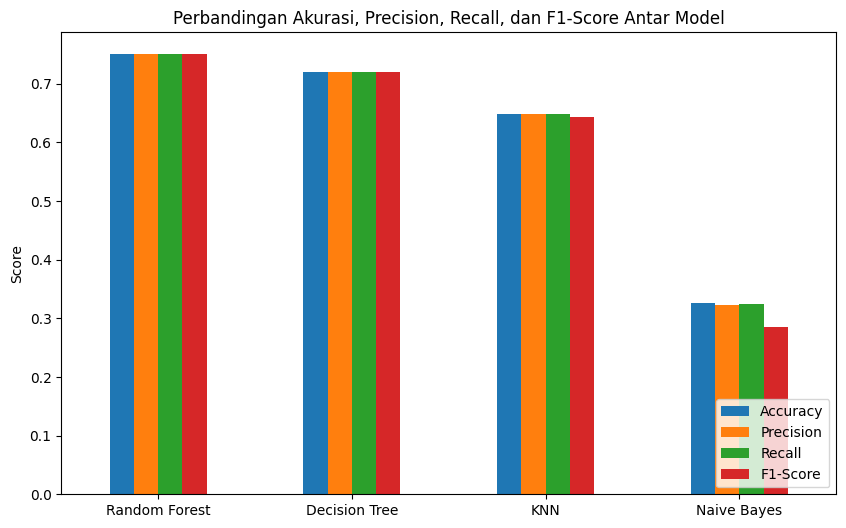

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
